In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [46]:
file = "Einstein_A.xlsx"

def Amplitude_model(x,A0,T):
    omega = 2* np.pi*x
    return(A0/(1+(omega**2)*(T**2)))

p0_guess = [1,0.003]

bounds_guess = [
    [0, #A0
     0 #T
     ],
    [
    np.inf, #A0
    np.inf #T
    ]
]

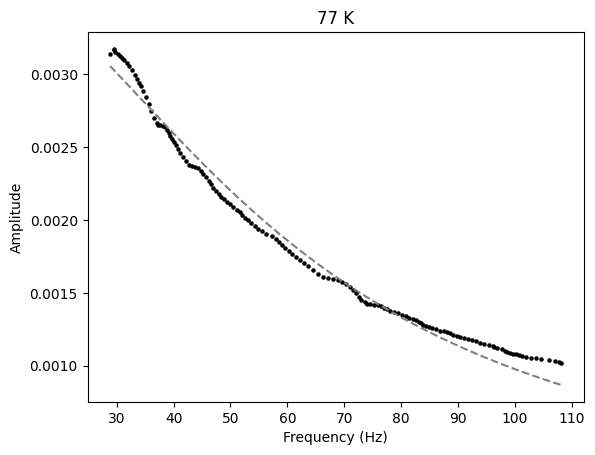

77_F_0: A = 0.002705 ± 0.000030


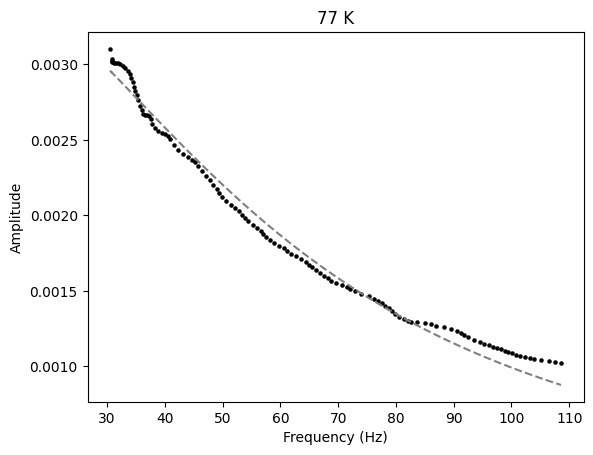

77_F_1: A = 0.002638 ± 0.000028


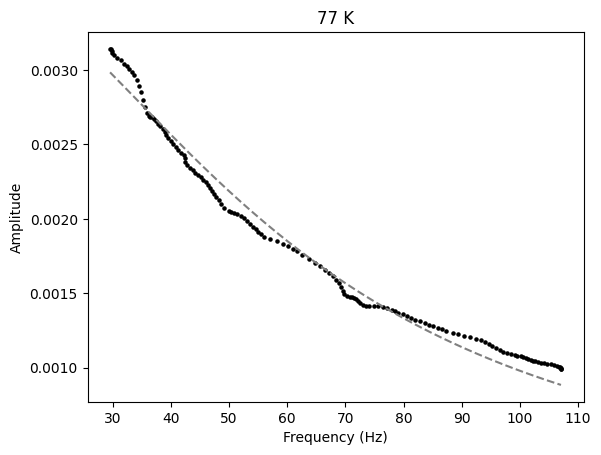

77_F_2: A = 0.002659 ± 0.000032


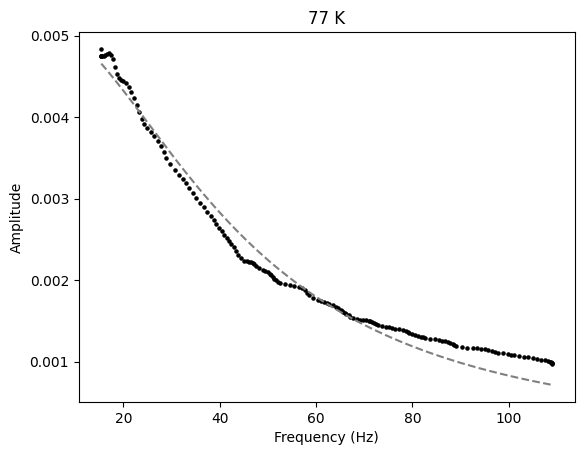

77_F_3: A = 0.003679 ± 0.000046


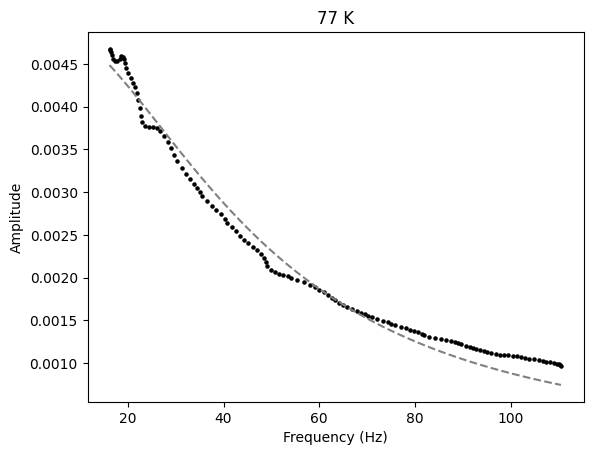

77_F_4: A = 0.003452 ± 0.000048


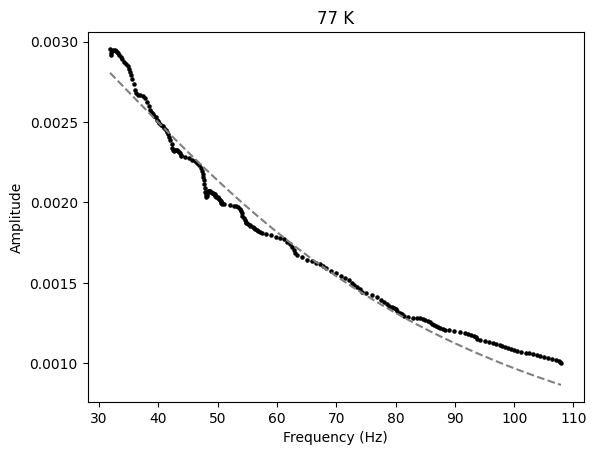

77_F_5: A = 0.002608 ± 0.000031


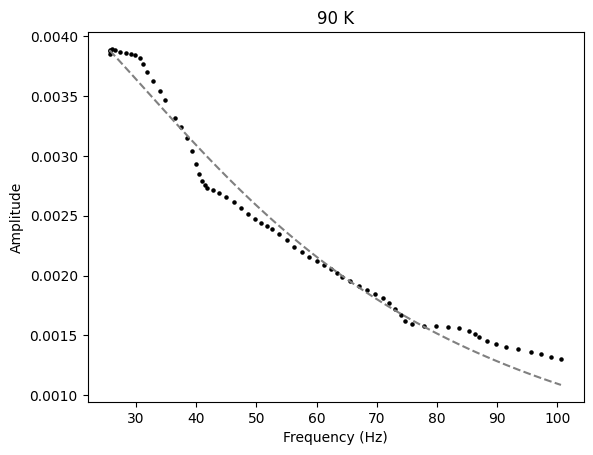

90_F_0: A = 0.002893 ± 0.000054


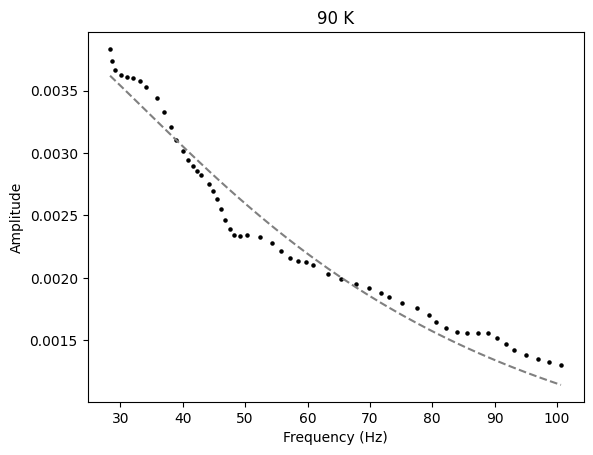

90_F_1: A = 0.002691 ± 0.000076


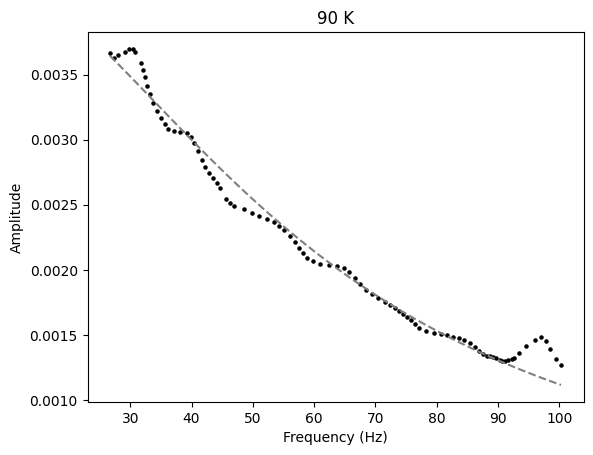

90_F_2: A = 0.002725 ± 0.000039


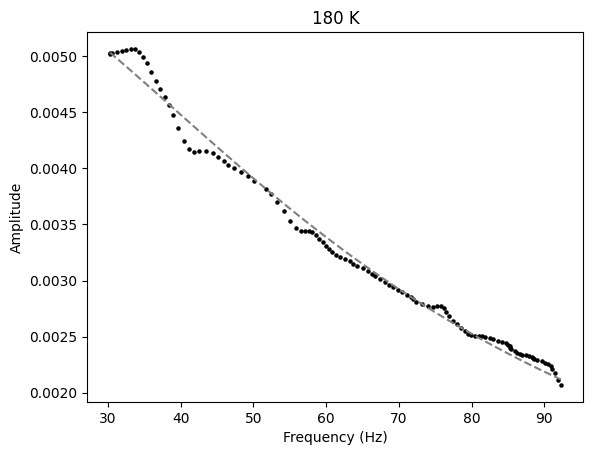

180_F_0: A = 0.002344 ± 0.000019


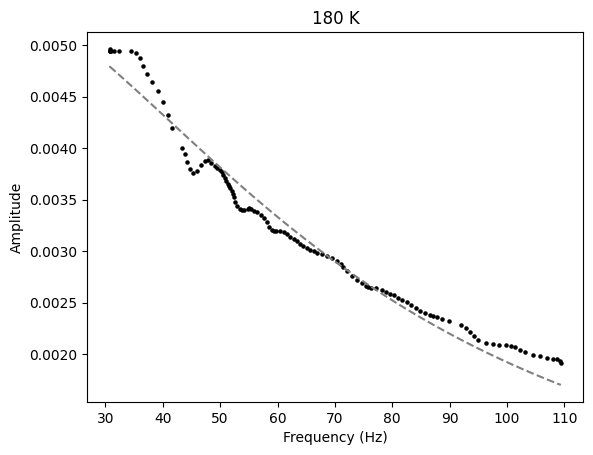

180_F_1: A = 0.002227 ± 0.000032


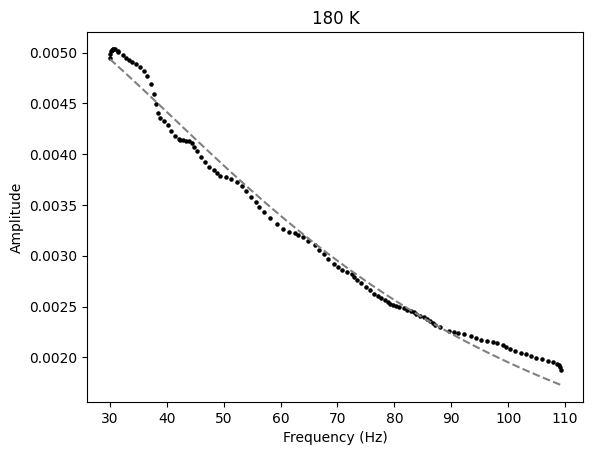

180_F_2: A = 0.002241 ± 0.000021

Averaged Einstein coefficients (with SEM):
77 K: 0.002957 ± 0.000195
90 K: 0.002770 ± 0.000062
180 K: 0.002271 ± 0.000037


In [48]:
df = pd.read_excel(file)

cols_x = ["77_F_0", "77_F_1", "77_F_2", "77_F_3", "77_F_4", "77_F_5",
          "90_F_0", "90_F_1", "90_F_2",
          "180_F_0", "180_F_1", "180_F_2"]

cols_y = ["77_I_0", "77_I_1", "77_I_2", "77_I_3", "77_I_4", "77_I_5",
          "90_I_0", "90_I_1", "90_I_2",
          "180_I_0", "180_I_1", "180_I_2"]

# Store coefficients by temperature
coeff_by_temp = {
    77: [],
    90: [],
    180: []
}

for colx, coly in zip(cols_x, cols_y):
    # Extract temperature from column name
    temp = int(colx.split("_")[0])

    xdata = df[colx].dropna()
    ydata = df[coly].dropna()

    pop, cov = curve_fit(
        Amplitude_model,
        xdata,
        ydata,
        p0=p0_guess,
        bounds=bounds_guess
    )

    # Store Einstein coefficient (T parameter)
    coeff_by_temp[temp].append(pop[1])

    # Plot as before
    plt.figure()
    plt.scatter(xdata, ydata, s=5, color="black")
    plt.plot(xdata, Amplitude_model(xdata, *pop),
             color="grey", linestyle="--")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.title(f"{temp} K")
    plt.show()

    print(f"{colx}: A = {pop[1]:.6f} ± {np.sqrt(cov[1][1]):.6f}")

# Compute averages with SEM
print("\nAveraged Einstein coefficients (with SEM):")

for temp in coeff_by_temp:
    values = np.array(coeff_by_temp[temp])
    mean = np.mean(values)
    sem = np.std(values, ddof=1) / np.sqrt(len(values))

    print(f"{temp} K: {mean:.6f} ± {sem:.6f}")